<a href="https://colab.research.google.com/github/HaiderAliSaeed/CE888_Lab/blob/main/All%20Labs/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
#https://github.com/albanda/CE888/tree/master/lab3

In [2]:
from zipfile import ZipFile
file_name = "/content/bank-additional.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
df = pd.read_csv("/content/bank-additional/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Data preprocessing:**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

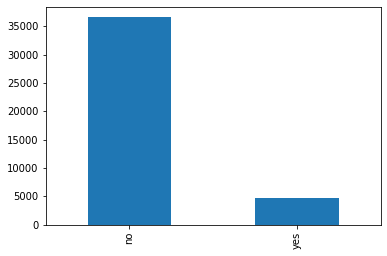

In [ ]:
#Plot histogram of the label and calculate the imbalance in the dataset.
import matplotlib.pyplot as plt
df['y'].value_counts().plot(kind='bar')

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [ ]:
#Use LabelEncoder to convert the label into numbers.
Encode = obj_df.apply(le.fit_transform)
Encode.head()


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


In [ ]:
#Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
#Column "duration" must be deleted
df.drop('duration', axis=1, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.drop(obj_df, axis=1, inplace=True)

df = pd.concat([df, Encode], axis=1, join='inner')
display(df)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,5,0,2,0,0,7,0,1,1
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,5,0,0,0,0,7,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,6,0,2,0,0,7,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,9,1,5,0,0,0,0,7,0,1,1


In [ ]:
#Check if there are any missing values in the dataset. If there are, drop the rows.
df_Missing = df.dropna( axis=0, how='all')

In [ ]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

**Let's model the data:**

In [ ]:
#Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, with a test size of 20% and random_state=50. Make sure the train/test split is stratified (and check that it is!). Stratified means that the percentages of classes in each fold remains constant.
from sklearn.model_selection import train_test_split
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.20,random_state=50)

In [ ]:
#Make sure the train/test split is stratified (and check that it is!). Stratified means that the percentages of classes in each fold remains constant.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32950, 19) (8238, 19) (32950,) (8238,)


In [ ]:
#Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clfRF = RandomForestClassifier(max_depth=3,n_estimators=100, )
clfRF.fit(X, y)
y_pred = clfRF.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9003398883224083


In [ ]:
#Use GridSearchCV to find a better set of parameters for your random forest.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 250, 300 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
y_pred_ = CV_rfc.predict(X_test)
print(accuracy_score(y_test, y_pred_))

0.9002184996358339


In [ ]:
#Print the cross-validation metric (whichever you previously chose) that you obtain for the random forest for the best parameters found with GridSearchCV


In [ ]:
#What are the top 3 features?
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 200}

Feature: 0, Score: 0.01322
Feature: 1, Score: 0.00050
Feature: 2, Score: 0.00026
Feature: 3, Score: 0.00007
Feature: 4, Score: 0.00175
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00004
Feature: 7, Score: 0.01007
Feature: 8, Score: 0.02389
Feature: 9, Score: 0.00142
Feature: 10, Score: 0.00143
Feature: 11, Score: 0.17707
Feature: 12, Score: 0.01368
Feature: 13, Score: 0.12209
Feature: 14, Score: 0.09227
Feature: 15, Score: 0.04652
Feature: 16, Score: 0.04737
Feature: 17, Score: 0.19209
Feature: 18, Score: 0.25623


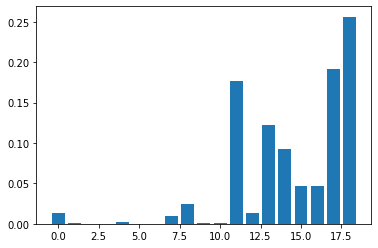

In [ ]:
from matplotlib import pyplot
# get importance
importance = clfRF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()